<h1 style = "font-size:3rem;color:darkcyan"> Speech Recognition - Digits </h1>

Training model to recognize spoken digits (0-9)

In [164]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display

import os
import sklearn

In [317]:
# importing data
# using the data set from: https://github.com/soerenab/AudioMNIST
# data is structured as follows:
# /60 folders containing speech of different persons
# each folder contains 500 labeled audio files, 50 audio files for each digit

root = '../../Datasets/Speech/Digits/AudioMNIST/data/'
folder_names = os.listdir(root)

n_audio_files = 0

#print(folder_names)
for i in range(0, len(folder_names)):
    filename = os.listdir(root+folder_names[i])
    n_audio_files += len(filename)

#filenames = os.listdir(root)

#print(f'Number of audio files: {len(filenames)} ')
#root

In [318]:
n_audio_files

30000

In [319]:
# extract label/ digit. In this case it is the first digit in the file name

labels = np.zeros(n_audio_files)

def extract_label(filename):
    return filename[0]

In [320]:
# create feature array

#data, = librosa.load('./data/'+name, sr = sr, mono=True)
n_mfcc = 20
features = np.zeros((n_audio_files, n_mfcc))

In [327]:
print(folder_names)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60']


In [373]:
sr = 48000
for i in range(0, len(folder_names)):
    filesnames = '' # reset string
    filenames = os.listdir(root+folder_names[i])
    print(f'Processing folder {i + 1} out of {len(folder_names)}')
    for j in range(len(filenames)):
        data, _ = librosa.load(root + folder_names[i] + '/' + filenames[j], sr= sr, mono=True)
        mfcc = librosa.feature.mfcc(y = data, sr = sr, n_mfcc=n_mfcc)
        features[i * len(filenames) + j] = mfcc.T.mean(0) # matrix mean
        labels[i * len(filenames) + j] = extract_label(filenames[j])

Processing folder 1 out of 60
Processing folder 2 out of 60
Processing folder 3 out of 60
Processing folder 4 out of 60
Processing folder 5 out of 60
Processing folder 6 out of 60
Processing folder 7 out of 60
Processing folder 8 out of 60
Processing folder 9 out of 60
Processing folder 10 out of 60
Processing folder 11 out of 60
Processing folder 12 out of 60
Processing folder 13 out of 60
Processing folder 14 out of 60
Processing folder 15 out of 60
Processing folder 16 out of 60
Processing folder 17 out of 60
Processing folder 18 out of 60
Processing folder 19 out of 60
Processing folder 20 out of 60
Processing folder 21 out of 60
Processing folder 22 out of 60
Processing folder 23 out of 60
Processing folder 24 out of 60
Processing folder 25 out of 60
Processing folder 26 out of 60
Processing folder 27 out of 60
Processing folder 28 out of 60
Processing folder 29 out of 60
Processing folder 30 out of 60
Processing folder 31 out of 60
Processing folder 32 out of 60
Processing folder

In [375]:
print(labels)

[0. 0. 0. ... 9. 9. 9.]


Text(0.5, 0, 'Digit Label')

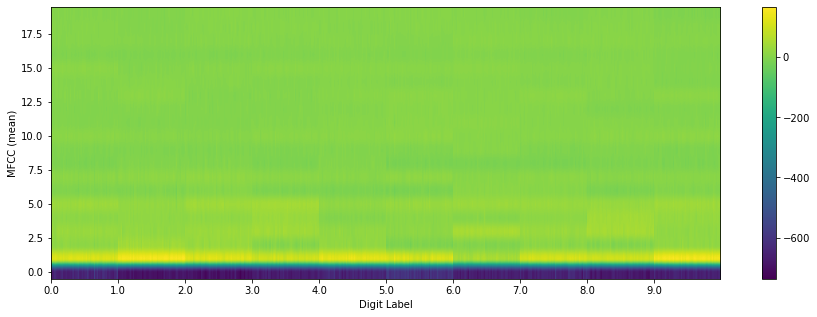

In [374]:
#plt.plot(features)
x_ticks = np.linspace(0, 450, 10)
#print(x_ticks)
x_labels = np.linspace(0, 9, 10)
#print(x_labels)
#plt.xticks(ticks=x_ticks, labels= x_labels)
#print(x_ticks)

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)

img = ax.imshow(features[:500].T)
fig.colorbar(img)

ax.set_aspect('auto')
plt.gca().invert_yaxis()

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)

ax.set_ylabel('MFCC (mean)')
ax.set_xlabel('Digit Label')
#plt.title('Mel Spectrogram')

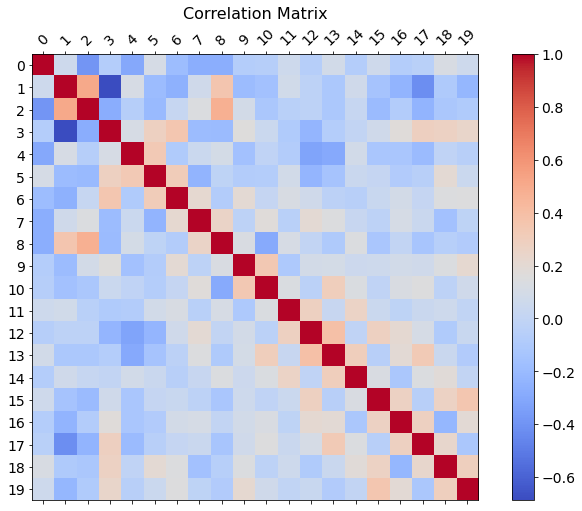

In [376]:
feature_names = np.linspace(0, n_mfcc - 1,n_mfcc)
df = pd.DataFrame(features)
f = plt.figure(figsize=(12, 8))
plt.matshow(df.corr(), fignum=f.number, cmap = 'coolwarm')
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [300]:
features[110]

array([-7.09e+02,  1.20e+02,  3.28e+01,  3.32e+01,  1.99e+01,  3.59e+01,
       -2.61e-01,  2.13e+01,  9.73e-01, -5.73e+00,  5.09e+00, -2.44e+00,
       -3.40e-01, -9.73e-01, -5.90e-01,  1.51e+00, -4.75e+00,  2.87e+00,
        4.10e+00,  4.36e+00])

In [301]:
data, _  = librosa.load(root + filenames[10], sr= sr, mono=True)
mfcc = librosa.feature.mfcc(y = data, sr = sr, n_mfcc=20)

print(mfcc.T.mean(0).shape)

(20,)


In [378]:
#merging everything into a single data structure
dataset = pd.DataFrame(features)
dataset['label'] = labels
#dataset['filename'] = filenames

#we can save the dataset to a file to resume working without re-computing the features (unless you want to change them)
#dataset.to_csv('dataset.csv')
dataset

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-651.792969,125.082855,14.676184,24.476522,14.822341,32.524208,-6.852278,14.238191,-6.298679,-6.007290,...,-1.070858,-4.968721,-0.302329,0.783053,10.485610,-9.527535,0.884058,3.378313,-0.157332,0.0
1,-675.418701,120.496872,17.857576,29.651102,18.610928,36.867523,-3.063675,10.415971,-5.865927,-2.258434,...,-4.275125,-3.186392,2.689194,1.196756,9.212469,-5.772840,4.626551,5.608649,2.007937,0.0
2,-630.504883,119.078598,13.994834,16.210178,13.585836,34.013218,-7.132136,15.575432,-7.252302,-5.977500,...,-3.518600,-2.659422,-3.452109,-0.733885,10.246149,-7.509597,4.174634,1.399633,0.845211,0.0
3,-633.645142,126.591614,9.361505,15.723633,11.496635,32.401176,-6.404471,5.314328,-11.817913,-8.420235,...,0.964620,-0.776027,0.319248,5.095439,13.526354,-8.272698,1.134416,3.302846,-1.863230,0.0
4,-661.522644,115.404343,14.578478,30.359596,11.532448,27.510567,-2.776231,8.657968,-9.531140,-4.685847,...,-1.679317,-5.533944,2.051777,2.917758,11.107314,-5.143217,-1.347403,-1.051834,-1.174666,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-666.063599,94.368408,24.866434,27.674509,21.682270,26.179129,-2.321839,0.889840,-1.831618,3.110181,...,1.124498,-6.319092,-1.859200,-6.825097,-0.514957,-8.980742,-6.473922,-3.582300,0.546544,9.0
29996,-666.681946,107.256287,35.125137,26.656052,22.323940,30.026657,-4.487443,-1.292328,2.823204,1.733122,...,-1.576584,-9.885405,-9.825562,-7.924049,-7.828240,-9.644059,-0.158530,-6.891603,-3.700594,9.0
29997,-681.487549,93.010468,33.671379,29.728848,27.685751,33.148720,-5.080503,-3.392767,-0.306485,-0.010222,...,-0.924768,-12.614414,-9.779232,-9.795484,-7.176035,-12.528312,-2.301409,-5.910634,-4.237979,9.0
29998,-669.299194,96.861855,29.082794,29.676912,26.404362,35.910511,-3.259255,-3.464525,0.661117,3.829483,...,-0.782386,-11.310943,-13.182616,-4.552127,-5.837046,-10.751757,1.079593,-7.937907,-4.782234,9.0


In [384]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.2, random_state=52)

In [385]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

In [386]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(n_mfcc), max_iter=2000, activation='relu', verbose=True)

#train the model
mlp.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = mlp.predict(feat_test)
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

Iteration 1, loss = 1.92392903
Iteration 2, loss = 1.25786011
Iteration 3, loss = 0.85924760
Iteration 4, loss = 0.66989565
Iteration 5, loss = 0.57118758
Iteration 6, loss = 0.51166288
Iteration 7, loss = 0.47229913
Iteration 8, loss = 0.44364640
Iteration 9, loss = 0.42168280
Iteration 10, loss = 0.40409845
Iteration 11, loss = 0.38909489
Iteration 12, loss = 0.37668979
Iteration 13, loss = 0.36570048
Iteration 14, loss = 0.35643798
Iteration 15, loss = 0.34764013
Iteration 16, loss = 0.34006786
Iteration 17, loss = 0.33331919
Iteration 18, loss = 0.32682721
Iteration 19, loss = 0.32101812
Iteration 20, loss = 0.31576520
Iteration 21, loss = 0.31055268
Iteration 22, loss = 0.30604871
Iteration 23, loss = 0.30176234
Iteration 24, loss = 0.29763512
Iteration 25, loss = 0.29402884
Iteration 26, loss = 0.29012362
Iteration 27, loss = 0.28642657
Iteration 28, loss = 0.28305284
Iteration 29, loss = 0.27970961
Iteration 30, loss = 0.27614542
Iteration 31, loss = 0.27324565
Iteration 32, los

Iteration 255, loss = 0.18416308
Iteration 256, loss = 0.18416907
Iteration 257, loss = 0.18422078
Iteration 258, loss = 0.18419308
Iteration 259, loss = 0.18433963
Iteration 260, loss = 0.18379585
Iteration 261, loss = 0.18405065
Iteration 262, loss = 0.18394553
Iteration 263, loss = 0.18352610
Iteration 264, loss = 0.18373637
Iteration 265, loss = 0.18348868
Iteration 266, loss = 0.18369680
Iteration 267, loss = 0.18362778
Iteration 268, loss = 0.18329328
Iteration 269, loss = 0.18340291
Iteration 270, loss = 0.18330117
Iteration 271, loss = 0.18347331
Iteration 272, loss = 0.18322099
Iteration 273, loss = 0.18338760
Iteration 274, loss = 0.18291993
Iteration 275, loss = 0.18285753
Iteration 276, loss = 0.18315758
Iteration 277, loss = 0.18320714
Iteration 278, loss = 0.18289674
Iteration 279, loss = 0.18316954
Iteration 280, loss = 0.18296131
Iteration 281, loss = 0.18301361
Iteration 282, loss = 0.18291087
Iteration 283, loss = 0.18280447
Iteration 284, loss = 0.18289078
Iteration 

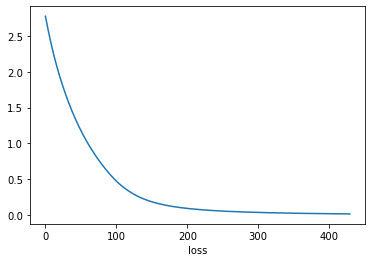

Mean squared error: 1.1727
Mean absolute error: 0.6115
Median absolute error: 0.3295
Coefficient of determination (R2 score): 0.8552
Explained variance score: 0.8559
R2 score on individual targets [0.86]


In [381]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.xlabel('loss')
plt.show()

#computing a set of performance metrics

#mean squared error (lower the better)
print('Mean squared error: %.4f'% sklearn.metrics.mean_squared_error(tar_test, tar_pred))

#mean absolute error (lower the better)
print('Mean absolute error: %.4f'% sklearn.metrics.mean_absolute_error(tar_test, tar_pred))

#median absolute error (lower the better)
print('Median absolute error: %.4f'% sklearn.metrics.median_absolute_error(tar_test, tar_pred))

#coefficient of determination (r2 score): 1 is perfect prediction (it can get arbitrary negative)
print('Coefficient of determination (R2 score): %.4f'% sklearn.metrics.r2_score(tar_test, tar_pred))

#explained variance score: 1 is perfect prediction (it can get arbitrary worse)
print('Explained variance score: %.4f'% sklearn.metrics.explained_variance_score(tar_test, tar_pred))

#this is is a better represenation of the r2 score when working with multiple outputs
#as it provides a value for each target value
print('R2 score on individual targets',sklearn.metrics.r2_score(tar_test, tar_pred, multioutput='raw_values') )

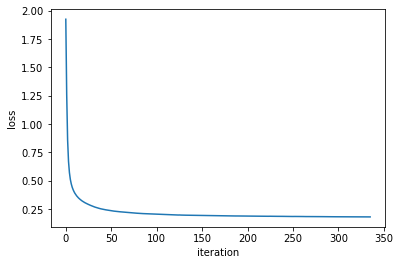

Number of mislabeled samples 428 out of 6000
Accuracy: 0.9286666666666666
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       574
         1.0       0.92      0.92      0.92       588
         2.0       0.90      0.89      0.89       577
         3.0       0.90      0.89      0.89       586
         4.0       0.95      0.95      0.95       620
         5.0       0.95      0.97      0.96       608
         6.0       0.99      0.99      0.99       587
         7.0       0.96      0.96      0.96       633
         8.0       0.91      0.93      0.92       643
         9.0       0.92      0.91      0.92       584

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

confusion matrix
[[502   4  40   6   6   2   0   6   2   6]
 [  2 541   1   0  15   0   0   0   0  29]
 [ 31   5 511  18   0   0   0   3   7   2]
 [ 14   0  10 521   0

In [388]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
print('confusion matrix')
print(sklearn.metrics.confusion_matrix(lab_test,lab_predict))

Confusion matrix, without normalization
[[502   4  40   6   6   2   0   6   2   6]
 [  2 541   1   0  15   0   0   0   0  29]
 [ 31   5 511  18   0   0   0   3   7   2]
 [ 14   0  10 521   0   0   0   1  40   0]
 [  6   8   0   0 592  14   0   0   0   0]
 [  6   0   0   1   6 587   0   3   1   4]
 [  0   0   0   0   0   0 581   2   4   0]
 [  7   2   4   0   0   6   3 605   3   3]
 [  2   0   0  34   0   0   4   3 599   1]
 [  6  29   1   1   2   8   0   4   0 533]]
Normalized confusion matrix
[[0.87 0.01 0.07 0.01 0.01 0.   0.   0.01 0.   0.01]
 [0.   0.92 0.   0.   0.03 0.   0.   0.   0.   0.05]
 [0.05 0.01 0.89 0.03 0.   0.   0.   0.01 0.01 0.  ]
 [0.02 0.   0.02 0.89 0.   0.   0.   0.   0.07 0.  ]
 [0.01 0.01 0.   0.   0.95 0.02 0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.01 0.97 0.   0.   0.   0.01]
 [0.   0.   0.   0.   0.   0.   0.99 0.   0.01 0.  ]
 [0.01 0.   0.01 0.   0.   0.01 0.   0.96 0.   0.  ]
 [0.   0.   0.   0.05 0.   0.   0.01 0.   0.93 0.  ]
 [0.01 0.05 0.   0.   0.

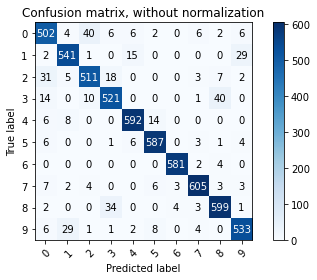

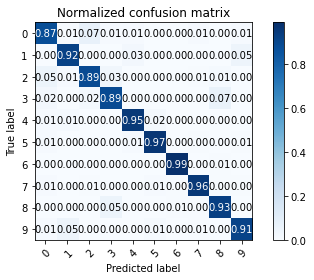

In [389]:
#this is a better way of visualizing the confusion matrix

#defining a function for the confusion matrix display 
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[sklearn.utils.multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#setting the precision to two digits after the decimal point
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(lab_test, lab_predict, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(lab_test, lab_predict, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], normalize=True,
                      title='Normalized confusion matrix')

plt.show()